In [1]:
%load_ext autoreload
%autoreload 2
# Preprocess
import os
import shutil

from spatz.utils.preprocess import preprocess_file


PATH = 'data/simulations/'

# Delete the old folder of preprocessed files.
if os.path.isdir(PATH + 'temp/'):
    shutil.rmtree(PATH + 'temp/')

# Create the folder again.
os.mkdir(PATH + 'temp/')

# Preprocess the files.
for file in os.listdir(PATH):
    if not os.path.isdir(PATH + file) and '.txt' in file:
        df = preprocess_file(PATH + file)
        df.to_csv(PATH + 'temp/' + file.replace('.txt', '.csv'))

In [2]:
from spatz.simulation import Simulation, UniformTimeSteps

# Construct a time model.
timesteps = UniformTimeSteps(0.1, mu=0, sigma=0, delay_only=True)

# Construct a simulation instance with the time model.
simulation = Simulation(timesteps)

In [8]:
#Setup Sensors / observers

from spatz.sensors.antenna.tx_gain import AntennaTxGain

altitude = simulation.add_observer(['altitude'])
pitch = simulation.add_observer(['pitch_l'])

antenna_tx_gain_sensor = simulation.add_sensor(AntennaTxGain,gain_pattern_path=f"data/gain_pattern/farfield_tx_aisler_v1.txt")

simulation.load(PATH + 'temp/' + '13.5.csv')
logger = simulation.get_logger()



Processed 65160 lines in 0.3s.
Used 65160 lines due to step size


In [14]:
# Run simulation
for step, t, dt in simulation.run(verbose=True):
    # Get the sensor data for the current time
    gain = antenna_tx_gain_sensor()
    
    
    # Get the correct altitude data.
    altitude()
    pitch()

df = logger.get_dataframe()
   

100%|█████████▉| 521.40000000005/521.469806781021 [00:17<00:00, 30.61it/s]   


In [15]:
df = logger.get_dataframe()
df

time antenna/tx_gain/rocket_x antenna/tx_gain/rocket_y  \
0        0.0                     <NA>                     <NA>   
1        0.1                -0.000002                 0.171335   
2        0.2                -0.000002                 0.171335   
3        0.3                -0.000002                 0.171335   
4        0.4                -0.000002                 0.171335   
...      ...                      ...                      ...   
5210   521.0                  0.00204                 0.999997   
5211   521.1                  0.00204                 0.999997   
5212   521.2                  0.00204                 0.999997   
5213   521.3                  0.00204                 0.999997   
10427  521.4                  0.00204                 0.999997   

      antenna/tx_gain/rocket_z antenna/tx_gain/pos_x antenna/tx_gain/pos_y  \
0                         <NA>                  <NA>                  <NA>   
1                     0.985213              0.769262              0.637524   
2                     0.985213              0.769249              0.637555   
3                     0.985213              0.769228              0.637607   
4                     0.985213              0.769199              0.637678   
...                        ...                   ...                   ...   
5210                  0.000922              0.167176               0.98588   
5211                  0.000922              0.167176               0.98588   
5212                  0.000922              0.167176               0.98588   
5213                  0.000922              0.167176              0.985879   
10427                 0.000922              0.167176              0.985879   

      antenna/tx_gain/pos_z antenna/tx_gain/theta antenna/tx_gain/out  \
0                      <NA>                  <NA>                <NA>   
1                  -0.04242             93.866758              -6.808   
2                 -0.042179             93.880686              -6.808   
3                 -0.041781             93.903746              -6.808   
4                 -0.041227             93.935798              -6.808   
...                     ...                   ...                 ...   
5210              -0.009586            170.473891              -5.719   
5211              -0.009633            170.473719              -5.719   
5212              -0.009681            170.473546              -5.719   
5213              -0.009729            170.473373              -5.719   
10427             -0.009777            170.473198              -5.719   

      general/altitude general/pitch_l  
0                 <NA>            <NA>  
1           319.189854        1.396263  
2           319.754649        1.396263  
3           320.689767        1.396263  
4            321.98961        1.396263  
...                ...             ...  
5210        321.436986        0.000023  
5211        320.918266        0.000023  
5212        320.399547        0.000023  
5213        319.880828        0.000023  
10427       319.362108        0.000023  

[5215 rows x 11 columns]

In [16]:
import matplotlib.pyplot as plt
import numpy as np

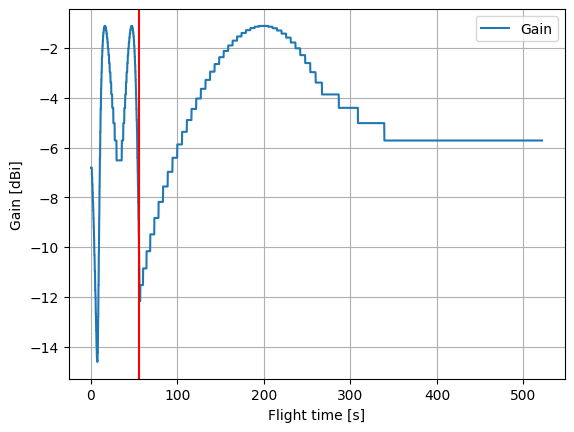

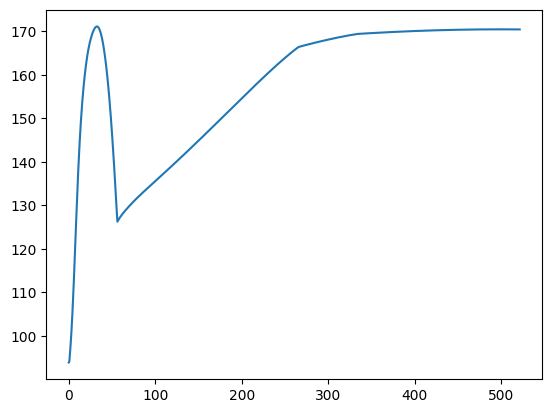

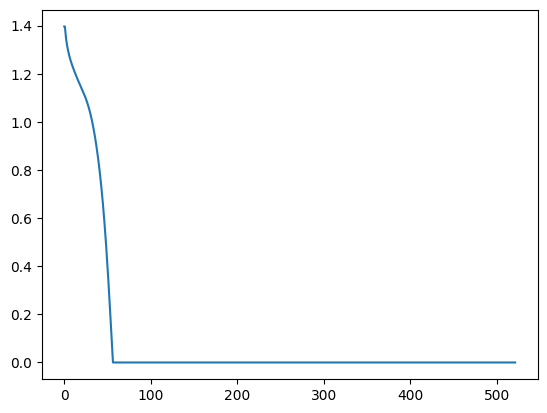

: 

In [17]:

plt.grid()
plt.plot(df['time'][1:], df['antenna/tx_gain/out'][1:], label='Gain')
plt.axvline(56,color="red")
plt.ylabel("Gain [dBi]")
plt.xlabel("Flight time [s]")
#plt.yticks(np.arange(+6,-12,-1))
#plt.plot(df['time'][1:], df['general/pitch_l'][1:].apply(lambda x: x*(180/np.pi)), label='Pitch')
plt.legend()
plt.show()

#plt.grid()
plt.plot(df["time"][1:], df["antenna/tx_gain/theta"][1:],label="Theta")
plt.show()


plt.plot(df["time"][1:], df["general/pitch_l"][1:],label="pitch")

In [ ]:
from spatz.sensors.antenna.tx_gain import GainPattern
from matplotlib import pyplot as plt
import numpy as np

Processed 65160 lines in 1.2s.
Used 65160 lines due to step size


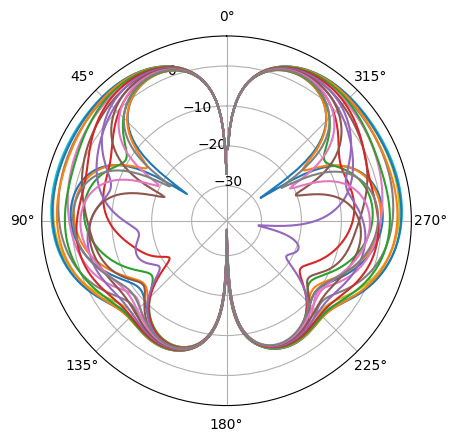

In [ ]:

pattern = GainPattern("data/gain_pattern/farfield_2_45_GHz.txt",1)
fig, ax1 = plt.subplots(1,1,subplot_kw={'projection': 'polar'})
ax1.set_theta_zero_location("N")

for i in range(0,90,5):    
    angles_phi, gain_phi = pattern.get_phi_cut(i) # Cut through X-Z plane (In sim actually Y-)
    ax1.plot(np.deg2rad(angles_phi), gain_phi)

Processed 65160 lines in 0.7s.
Used 65160 lines due to step size


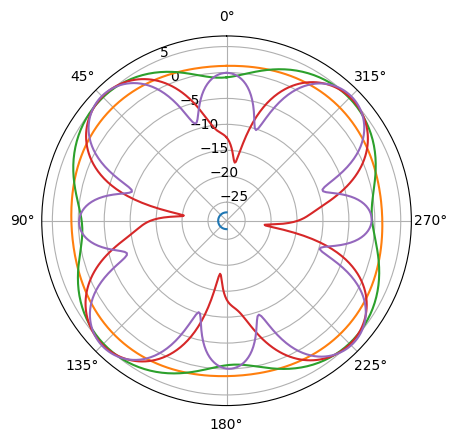

In [ ]:
pattern = GainPattern("data/gain_pattern/farfield_2_45_GHz.txt",1)
fig, ax = plt.subplots(1,1,subplot_kw={'projection': 'polar'})
for i in range(0,90,20):
    thetas, gains = pattern.get_theta_cut(i)
    ax.set_theta_zero_location("N")
    ax.plot(np.deg2rad(thetas),gains)

Text(0.5, 0, 'Dist [m]')

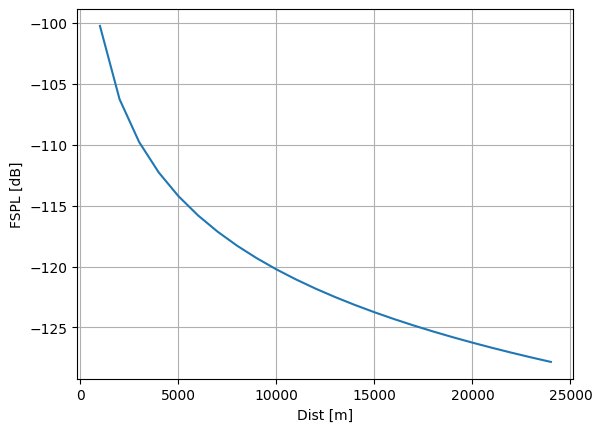

In [ ]:
#FSPL graph
from scipy import constants

def fspl(r,lamb):
    return 10* np.log10( (lamb/(4*np.pi*r)) ** 2 )


distances = np.arange(1e3,25e3,1e3)
lab = constants.c/2.45e9

plt.plot(distances,fspl(distances,lamb=lab))
plt.grid()
plt.ylabel("FSPL [dB]")
plt.xlabel("Dist [m]")